### Este es el entregable de la práctica del módulo ***Machine Learning 101***

El objetivo de la práctica es predecir el precio de las viviendas de airbnb utilizando los datos disponibles

Lo primero que se hace es cargar el conjunto de datos, y a continuación dividirlo entre el conjunto de entrenamiento y el conjunto de test. Luego se almacena cada conjunto en un archivo csv diferente, de esa forma se asegura el no tocar el conjunto de test hasta que se vaya a evaluar el modelo.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [2]:
#Se establece que pandas muestre todas las filas del dataframe
pd.set_option('max_rows', None)

In [3]:
df.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.025308e+07,5.566485e+06,1.986400e+04,5.510692e+06,1.125754e+07,1.531982e+07,1.858361e+07
Scrape ID,11824.0,2.017038e+13,5.505346e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.588310e+07,3.411993e+07,1.745300e+04,6.855490e+06,2.454770e+07,5.431096e+07,1.247534e+08
Host Response Rate,10317.0,9.480372e+01,1.524708e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11824.0,4.049163e+01,4.701030e+00,-3.785118e+01,4.040976e+01,4.041933e+01,4.043078e+01,5.596691e+01
Longitude,11824.0,-3.776863e+00,1.401469e+01,-1.231244e+02,-3.707538e+00,-3.700763e+00,-3.683917e+00,1.533714e+02
Accommodates,11824.0,3.277486e+00,2.093973e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11780.0,1.285229e+00,6.646911e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


Una vez realizado un análisis básico de las características que componen el dataframe se decide que las siguientes características no influyen en el valor de la variable Price, por lo que se procede a eliminarlas

In [6]:
#Características a eliminar

#ID - Identificador (no aporta información para predecir el precio)
#Listing Url - URL (no aporta información para predecir el precio)
#Scrape ID - Identificador del scrapeado (no aporta información para predecir el precio)
#Last Scraped - Fecha del último scrapeado (no aporta información para predecir el precio)
#Name - Nombre (no aporta información para predecir el precio)
#Summary - Resumen (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Street - Calle (no aporta información para predecir el precio, ya que ya tenemos el barrio)
#Space - Descripción de los espacios (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Zipcode - Código postal (ya tenemos la característica de barrio, por lo que no nos aporta muchas más información)
#Description - Descripción (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Neighborhood Overview - Descripción del vecindario (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Notes - Notas (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Transit - Descripción de medios de transporte cercanos (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Access - Diferentes detalles (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Interaction - Detalles acerca de la comunicación con los dueños (no aporta información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#House Rules - Reglas a cumplir en la vivienda (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Thumbnail Url - URL (no aporta información para predecir el precio)
#Medium Url - URL (no aporta información para predecir el precio)
#Picture Url - URL (no aporta información para predecir el precio)
#XL Picture Url - URL (no aporta información para predecir el precio)
#Host ID - Identificador del propietario (no aporta información para predecir el precio)
#Host URL - URL del propietario (no aporta información para predecir el precio)
#Host Name - Nombre del propietario (no aporta información para predecir el precio)
#Host Since - Desde cuando está alquilando la vivienda el propietario (no aporta información para predecir el precio)
#Host Location - La ubicación del propietario (no aporta información para predecir el precio)
#Host About - Información acerca del propietario (no aporta información para predecir el precio)
#Host Response Time - Tiempo de respuesta del propietario (no aporta información para predecir el precio)
#Host Response Rate - Ratio de respuesta del propietario (no aporta información para predecir el precio)
#Host Acceptance Rate - Ratio de aceptación del propietario (no aporta información para predecir el precio)
#Host Thumbnail Url - URL del propietario (no aporta información para predecir el precio)
#Host Picture Url - URL del propietario (no aporta información para predecir el precio)
#Host Neighbourhood - Barrio del propietario (no aporta información para predecir el precio)
#Host Listings Count - Número de anuncios del propietario (no aporta información para predecir el precio)
#Host Total Listings Count - Número total de anuncios del propietario (no aporta información para predecir el precio)
#Host Verifications - Información verificada del propietario (no aporta información para predecir el precio)
#State - Comunidad donde está ubicada la vivienda (no nos hace falta esta información porque ya tenemos el campo City)
#Market - Mercado (no nos hace falta esta información porque ya tenemos el campo City)
#Smart Location - Ubicación (no nos hace falta esta información porque ya tenemos el campo City)
#Country Code - Código de país (no nos hace falta esta información porque ya tenemos el campo City)
#Country - País (no nos hace falta esta información porque ya tenemos el campo City)
#Property Type - Tipo de vivienda (no hay una gran variedad de tipos de propiedad como para que sea una característica relevante para predecir el precio)
#Bed Type - Tipo de cama (no aporta información para predecir el precio)
#Amenities - Diferentes servicios o comodidades que posee la vivienda (no aportan información para predecir el precio sin realizar un tratamiento previo de la información almacenada en ese campo (no está en el alcance de esta práctica))
#Weekly Price - Precio semanal de la vivienda (no nos hace falta esta información porque ya tenemos el campo Price, además, es el campo que tenemos que predecir)
#Monthly Price - Precio mensual de la vivienda (no nos hace falta esta información porque ya tenemos el campo Price, además, es el campo que tenemos que predecir)
#Extra People - Cantidad de personas adicionales (no nos aporta mucha información porque no tiene datos diferentes de cero en los tres primeros cuartiles)
#Calendar Updated- Actualización del calendario (no aporta información para predecir el precio)
#Calendar last Scraped - Fecha de la última vez que se escrapeó esta vivienda (no aporta información para predecir el precio)
#First Review - Fecha del primer review (no aporta información para predecir el precio)
#Last Review - Fecha del último review (no aporta información para predecir el precio)
#License - Licencia de la vivienda (no aporta información para predecir el precio)
#Jurisdiction Names - Nombres de jurisdicción (no aporta información para predecir el precio)
#Calculated host listings count - Número de anuncios del propietario (no aporta información para predecir el precio)
#Geolocation - Geolocalización (es redundante con Latitude y Longitude)
#Features - Características del host y vivienda (no aportan información para predecir el precio)

#Se procede a eliminar las características indicadas
df = df.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary', 'Street','Space','Zipcode','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','State','Market','Smart Location','Country Code','Country','Bed Type','Property Type','Amenities','Weekly Price','Monthly Price','Extra People','Calendar Updated','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
df.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1,1,1.5,3,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,474.0,396.489451,671.125823,0.000000,0.000000,90.000000,624.000000,6997.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Security Deposit,5052.0,189.312154,116.011858,0.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,6974.0,32.073129,31.278032,0.000000,15.000000,25.000000,40.000000,662.000000


In [8]:
df.dtypes

Experiences Offered              object
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Latitude                        float64
Longitude                       float64
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Square Feet                     float64
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Minimum Nights                    int64
Maximum Nights                    int64
Has Availability                 object
Availability 30                   int64
Availability 60                   int64
Availability 90                   int64
Availability 365                  int64
Number of Reviews                 int64


Se comprueba el número de NaN que posee cada característica

In [9]:
print(df.isnull().sum(axis=0))

Experiences Offered                 0
Neighbourhood                    4159
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
Latitude                            0
Longitude                           0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Square Feet                     11350
Price                              15
Security Deposit                 6772
Cleaning Fee                     4850
Guests Included                     0
Minimum Nights                      0
Maximum Nights                      0
Has Availability                11815
Availability 30                     0
Availability 60                     0
Availability 90                     0
Availability 365                    0
Number of Reviews                   0
Review Scores Rating             2661
Review Score

Se puede observar que de las tres características 'Neighbour' hay una que no tiene ningún NaN, por lo que esa es la que se utilizará y se eliminarán las otras dos
También se observa que las características 'Square Feet' y 'Has Availability' tienen más de 11000 NaNs, por lo que estas dos características también se eliminarán
Así como la característica 'Security Deposit' tiene 6772 NaNs, y también se eliminará.

In [10]:
df = df.drop(['Neighbourhood','Neighbourhood Group Cleansed','Square Feet','Has Availability','Security Deposit'], axis=1)
df.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
City,Madrid,Madrid,Madrid,Madrid,Madrid
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1,1,1.5,3,1
Bedrooms,1,1,1,1,1
Beds,2,2,8,1,1


Se observa que gran parte de las viviendas están ubicadas en Madrid, por lo que se realiza el filtro sólo con las viviendas de Madrid y se elimina la caractarística City porque ya hace falta después del filtro

In [11]:
print('Las viviendas totales son: ',df.shape[0])
df = df[df['City']=='Madrid']
print('Las viviendas de Madrid son: ',df.shape[0])

Las viviendas totales son:  11824
Las viviendas de Madrid son:  10567


In [12]:
#Se elimina la característica 'City' porque ya todas las viviendas son de Madrid
df = df.drop(['City'], axis=1)
df.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1,1,1.5,3,1
Bedrooms,1,1,1,1,1
Beds,2,2,8,1,1
Price,60,50,10,30,32


In [13]:
df.dtypes

Experiences Offered             object
Neighbourhood Cleansed          object
Latitude                       float64
Longitude                      float64
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Price                          float64
Cleaning Fee                   float64
Guests Included                  int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 30                  int64
Availability 60                  int64
Availability 90                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value      

Se va a tratar la característica Experiences Offered dejando con valor 'none' si tienen ese valor o si son nulos, y el valor 'yes' si tienen algún valor diferente.

In [14]:
df['Experiences Offered'].fillna('none', inplace=True)
df.loc[df['Experiences Offered']!='none','Experiences Offered']='yes'

Se categorizan las características que no son numéricas.

In [15]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

df['Neighbourhood Cleansed']=le1.fit_transform(df['Neighbourhood Cleansed'])
df['Experiences Offered']=le2.fit_transform(df['Experiences Offered'])
df['Room Type']=le3.fit_transform(df['Room Type'])
df['Cancellation Policy']=le4.fit_transform(df['Cancellation Policy'])
df.dtypes

Experiences Offered              int32
Neighbourhood Cleansed           int32
Latitude                       float64
Longitude                      float64
Room Type                        int32
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Price                          float64
Cleaning Fee                   float64
Guests Included                  int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 30                  int64
Availability 60                  int64
Availability 90                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value      

Se genera la matriz de correlación para analizar las correlaciones de las características.

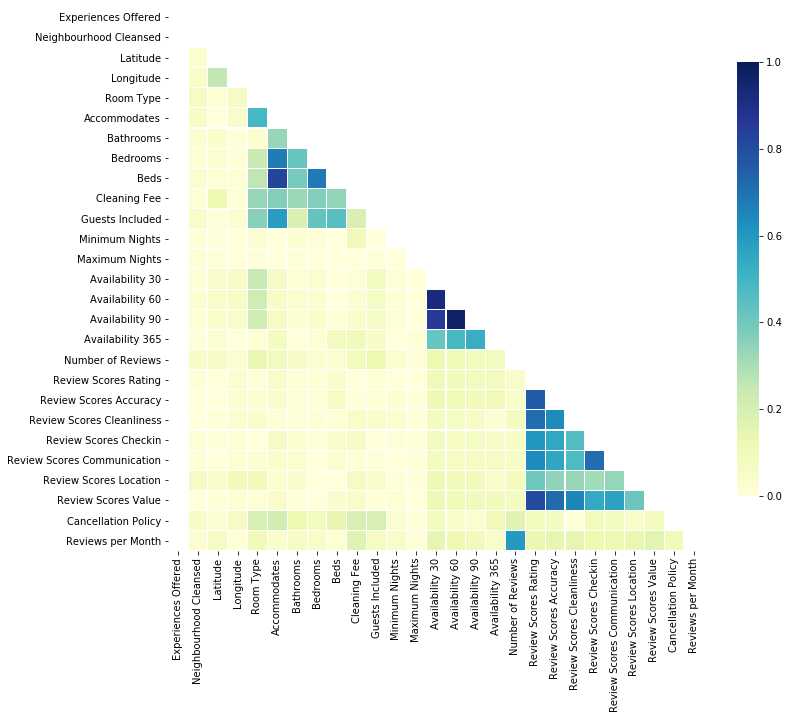

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Como se puede observar en la matriz de correlación, hay características fuertemente relacionadas.

'Beds' está relacionada con 'Accommodates' y 'Bedrooms', por lo que se va a eliminar 'Beds'.

'Availability 30', 'Availability 60' y 'Availability 90' están fuertemente relacionadas, y también están relacionadas con 'Availability 365' por lo que se va a crear una nueva característica que sea la media de la disponibilidad por día de cada una de ellas, después se eliminarán estas 4 características porque ya se dispondrá de la nueva.

La característica 'Number of Reviews' está fuertemente relacionada con 'Reviews per Month', por lo que se queda 'Number of Reviews' porque no tiene nulos y se eliminará la otra.

Las otras características de reviews están fuertemente correlacionadas, por lo que se queda 'Review Scores Rating' que tiene menor número de NaNs y se eliminarán las otras.

In [17]:
df['Availability'] = ((df['Availability 30']/30)+(df['Availability 60']/60)+(df['Availability 90']/90)+(df['Availability 365']/365))/4

df = df.drop(['Beds','Availability 60','Availability 90','Availability 30','Availability 365','Reviews per Month','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'], axis=1)

In [18]:
df.head().T

,0,1,2,3,4
Experiences Offered,0.000000,0.000000,0.000000,0.000000,0.000000
Neighbourhood Cleansed,61.000000,111.000000,123.000000,48.000000,54.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Room Type,0.000000,0.000000,2.000000,1.000000,1.000000
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Price,60.000000,50.000000,10.000000,30.000000,32.000000
Cleaning Fee,25.000000,15.000000,5.000000,NaN,NaN


Ahora se van a sustituir los valores nulos de las características.

Antes de nada se va a ver qué características tienen algún valor nulo.

In [19]:
df.isnull().sum(axis=0)

Experiences Offered          0
Neighbourhood Cleansed       0
Latitude                     0
Longitude                    0
Room Type                    0
Accommodates                 0
Bathrooms                   40
Bedrooms                    18
Price                        8
Cleaning Fee              4285
Guests Included              0
Minimum Nights               0
Maximum Nights               0
Number of Reviews            0
Review Scores Rating      2286
Cancellation Policy          0
Availability                 0
dtype: int64

Los valores nulos de la característica 'Cleaning Fee' se sustituyen por el valor 0.

Los valores nulos de las características 'Bathrooms', 'Bedrooms', 'Price' y 'Review Scores Rating', como son variables continuas, las se sustituyen por la media.

In [20]:
df['Cleaning Fee'].fillna(0, inplace=True)

df['Bathrooms'].fillna(df['Bathrooms'].mean(),inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)

df.isnull().sum(axis=0)

Experiences Offered       0
Neighbourhood Cleansed    0
Latitude                  0
Longitude                 0
Room Type                 0
Accommodates              0
Bathrooms                 0
Bedrooms                  0
Price                     0
Cleaning Fee              0
Guests Included           0
Minimum Nights            0
Maximum Nights            0
Number of Reviews         0
Review Scores Rating      0
Cancellation Policy       0
Availability              0
dtype: int64

Se va a realizar el tratamiento de outliers.

Se dibujan los histogramas de todas las variables continuas, y dependiendo de los valores que tengan se les aplicará un determinado tratamiendo a los outliers.

In [21]:
#Se define la función para el tratamiento de outliers mediante el rango intercuartil
#Asignando el valor máximo y mínimo permitido (corte_arriba y corte_abajo) a los valores que se pasan por arriba o por abajo de dichos valores
def rango_intercuartil_outliers(datos, columna):
    cuartil1 = datos[columna].quantile(0.25)
    cuartil3 = datos[columna].quantile(0.75)
    ric = cuartil3-cuartil1 #Rango InterCuartil
    corte_abajo  = cuartil1-1.5*ric
    corte_arriba = cuartil3+1.5*ric
    datos[columna] = np.where(datos[columna]<corte_abajo, corte_abajo, datos[columna])
    datos[columna] = np.where(datos[columna]>corte_arriba, corte_arriba, datos[columna])
    print('Cuartil 1: ',cuartil1)
    print('Cuartil 3: ',cuartil3)
    print('RIC: ',ric)
    print('Corte por abajo: ',corte_abajo)
    print('Corte por arriba: ',corte_arriba)
    return

Primero se dibujará el histograma de cada variable continua, que son las indicadas a continuación
y luego, dependiendo de los valores que tenga, se realizará el tratamiento de outliers si hace falta.

'Price', 
'Bathrooms', 
'Bedrooms', 
'Accommodates', 
'Cleaning Fee', 
'Guests Included', 
'Minimum Nights', 
'Maximum Nights', 
'Availability', 
'Number of Reviews' y 
'Review Scores Rating'

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiences Offered,10567.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neighbourhood Cleansed,10567.0,68.576890,33.390608,0.000000,48.000000,62.000000,104.000000,124.000000
Latitude,10567.0,40.420436,0.019802,40.332908,40.410092,40.418471,40.427683,40.514247
Longitude,10567.0,-3.697122,0.023267,-3.835498,-3.707766,-3.701573,-3.693876,-3.575142
Room Type,10567.0,0.414593,0.520148,0.000000,0.000000,0.000000,1.000000,2.000000
Accommodates,10567.0,3.188228,1.989624,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10567.0,1.256863,0.607032,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10567.0,1.294909,0.832540,0.000000,1.000000,1.000000,2.000000,10.000000
Price,10567.0,66.185150,56.142894,9.000000,31.000000,53.000000,80.000000,875.000000
Cleaning Fee,10567.0,17.849815,25.570409,0.000000,0.000000,10.000000,30.000000,500.000000


Se va a analizar si hay outliers en Price.
Para eso se procede a dibujar el histograma de Price.

Text(0.5, 0, 'Price')

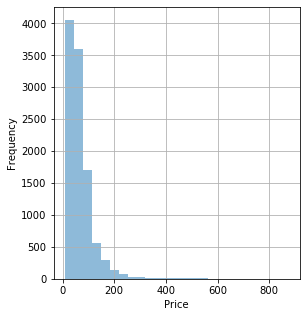

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

En la característica Price se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil

In [24]:
rango_intercuartil_outliers(df,'Price')

Cuartil 1:  31.0
Cuartil 3:  80.0
RIC:  49.0
Corte por abajo:  -42.5
Corte por arriba:  153.5


Se va a analizar si hay outliers en Bathrooms.
Para eso se procede a dibujar el histograma de Bathrooms.

Text(0.5, 0, 'Bathrooms')

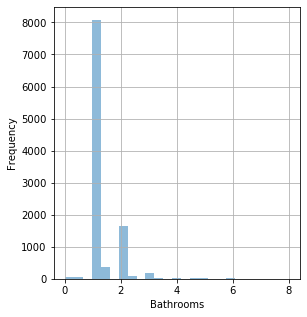

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

En el histograma se observa que hay viviendas que tienen 0 baños, y eso no es posible, por lo que se asignará 1 baño a esas viviendas.
El valor más alto es 8 pero puede que haya alguna vivienda grande.

In [26]:
df.loc[df['Bathrooms']==0,'Bathrooms']=1

Se va a analizar si hay outliers en Bedrooms.
Para eso se procede a dibujar el histograma de Bedrooms.

Text(0.5, 0, 'Bedrooms')

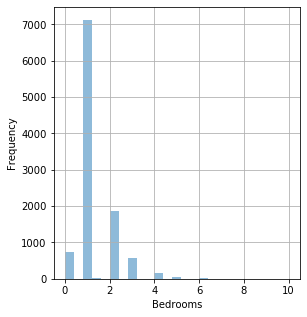

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

Este es el mismo caso que el de Bathrooms, hay algunas viviendas que tienen 0 dormitorios, por lo que a esas viviendas se les asignará 1 dormitorio.
El valor más alto es 10 dormitorios, pero puede que haya alguna vivienda grande o que se alquile por habitaciones.

In [28]:
df.loc[df['Bedrooms']==0,'Bedrooms']=1

Se va a analizar si hay outliers en Accommodates.
Para eso se procede a dibujar el histograma de Accommodates.

Text(0.5, 0, 'Accommodates')

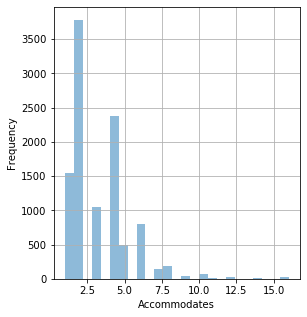

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

En la característica Accommodates se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [30]:
rango_intercuartil_outliers(df,'Accommodates')

Cuartil 1:  2.0
Cuartil 3:  4.0
RIC:  2.0
Corte por abajo:  -1.0
Corte por arriba:  7.0


Se va a analizar si hay outliers en Cleaning Fee.
Para eso se procede a dibujar el histograma de Cleaning Fee.

Text(0.5, 0, 'Cleaning Fee')

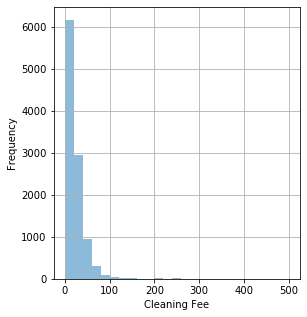

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

En la característica Cleaning Fee se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil

In [32]:
rango_intercuartil_outliers(df,'Cleaning Fee')

Cuartil 1:  0.0
Cuartil 3:  30.0
RIC:  30.0
Corte por abajo:  -45.0
Corte por arriba:  75.0


Se va a analizar si hay outliers en Guests Included.
Para eso se procede a dibujar el histograma de Guests Included.

Text(0.5, 0, 'Guests Included')

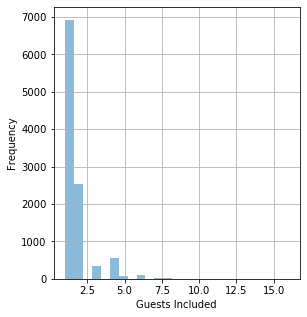

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

En la característica Guests Included no se observan outliers porque el valor mínimo es 0, y el máximo es 16, pero puede tratarse de una vivienda grande.

Se va a analizar si hay outliers en Minimum Nights.
Para eso se procede a dibujar el histograma de Minimum Nights.

Text(0.5, 0, 'Minimum Nights')

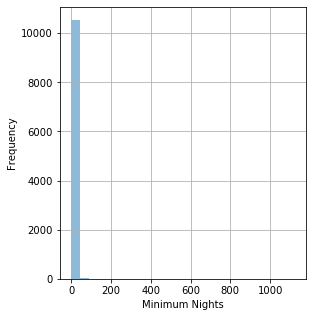

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

En la característica Minimum Nights se observa que sí que hay outliers y que se puede leaplicar la función del rango intercuartil.

In [35]:
rango_intercuartil_outliers(df,'Minimum Nights')

Cuartil 1:  1.0
Cuartil 3:  3.0
RIC:  2.0
Corte por abajo:  -2.0
Corte por arriba:  6.0


Se va a analizar si hay outliers en Maximum Nights.
Para eso se procede a dibujar el histograma de Maximum Nights.

Text(0.5, 0, 'Maximum Nights')

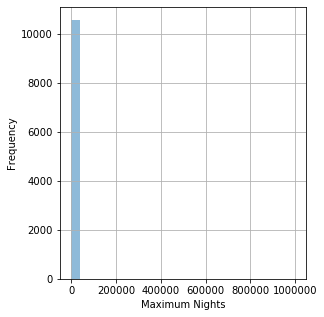

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

En la característica Maximum Nights se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [37]:
rango_intercuartil_outliers(df,'Maximum Nights')

Cuartil 1:  365.0
Cuartil 3:  1125.0
RIC:  760.0
Corte por abajo:  -775.0
Corte por arriba:  2265.0


Se va a analizar si hay outliers en Availability.
Para eso se procede a dibujar el histograma de Availability.

Text(0.5, 0, 'Availability')

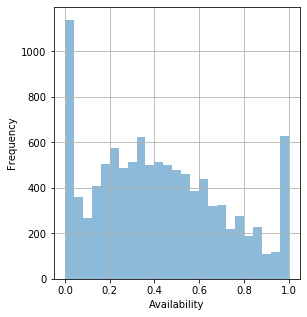

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Availability'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability')

En la característica Availability el valor mínimo es 0 y el máximo 1, y no hay ningún outlier.

Se va a analizar si hay outliers en Number of Reviews.
Para eso se procede a dibujar el histograma de Number of Reviews.

Text(0.5, 0, 'Number of Reviews')

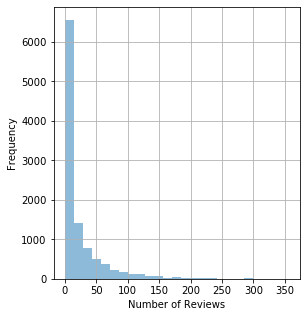

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')

En la característica Number of Reviews se observa que sí que hay outliers y que se le puede aplicar la función del rango intercuartil.

In [40]:
rango_intercuartil_outliers(df,'Number of Reviews')

Cuartil 1:  1.0
Cuartil 3:  28.0
RIC:  27.0
Corte por abajo:  -39.5
Corte por arriba:  68.5


Se va a analizar si hay outliers en Review Scores Rating.
Para eso se procede a dibujar el histograma de Review Scores Rating.

Text(0.5, 0, 'Review Scores Rating')

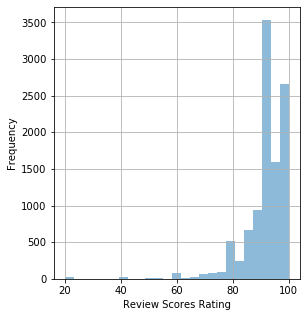

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

En la característica Review Score Rating el valor mínimo es 20 y el máximo 100, por lo que no hay ningún outlier.

Una vez terminado el tratamiento de outliers se va a mover la característica Price a la  primera posición para dividir en x e y.

In [42]:
df=df[['Price']+[c for c in df if c not in ['Price']]]
df.columns

Index(['Price', 'Experiences Offered', 'Neighbourhood Cleansed', 'Latitude',
       'Longitude', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Availability'],
      dtype='object')

Ahora se va a dividir el dataset de train en x e y.

In [71]:
from sklearn import preprocessing
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Se escala (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Ahora se van a realizar en el subconjunto de test todas las operaciones que se han hecho en el subconjunto de entrenamiento.

In [72]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [73]:
df_test = df_test.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary', 'Street','Space','Zipcode','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','State','Market','Smart Location','Country Code','Country','Property Type','Bed Type','Amenities','Weekly Price','Monthly Price','Extra People','Calendar Updated','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Calculated host listings count','Geolocation','Features'], axis=1)
df_test = df_test.drop(['Neighbourhood','Neighbourhood Group Cleansed','Square Feet','Has Availability','Security Deposit'], axis=1)
df_test = df_test[df_test['City']=='Madrid']
df_test = df_test.drop(['City'], axis=1)

#Se ajustan con las categorías de train, sólo la parte del transform, sin el fit
df_test['Neighbourhood Cleansed']=le1.transform(df_test['Neighbourhood Cleansed'])
df_test['Experiences Offered']=le2.transform(df_test['Experiences Offered'])
df_test['Room Type']=le3.transform(df_test['Room Type'])
df_test['Cancellation Policy']=le4.transform(df_test['Cancellation Policy'])

df_test['Availability'] = ((df_test['Availability 30']/30)+(df_test['Availability 60']/60)+(df_test['Availability 90']/90)+(df_test['Availability 365']/365))/4
df_test = df_test.drop(['Beds','Availability 30','Availability 60','Availability 90','Availability 365','Reviews per Month','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'], axis=1)

df_test['Cleaning Fee'].fillna(0, inplace=True)


df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(),inplace=True)
df_test['Bedrooms'].fillna(df_test['Bedrooms'].mean(), inplace=True)
df_test['Price'].fillna(df_test['Price'].mean(), inplace=True)
df_test['Review Scores Rating'].fillna(df_test['Review Scores Rating'].mean(), inplace=True)

rango_intercuartil_outliers(df_test,'Price')
df_test.loc[df_test['Bathrooms']==0,'Bathrooms']=1
df_test.loc[df_test['Bedrooms']==0,'Bedrooms']=1
rango_intercuartil_outliers(df_test,'Cleaning Fee')
rango_intercuartil_outliers(df_test,'Minimum Nights')
rango_intercuartil_outliers(df_test,'Maximum Nights')
rango_intercuartil_outliers(df_test,'Number of Reviews')

Cuartil 1:  30.0
Cuartil 3:  80.0
RIC:  50.0
Corte por abajo:  -45.0
Corte por arriba:  155.0
Cuartil 1:  0.0
Cuartil 3:  29.0
RIC:  29.0
Corte por abajo:  -43.5
Corte por arriba:  72.5
Cuartil 1:  1.0
Cuartil 3:  3.0
RIC:  2.0
Corte por abajo:  -2.0
Corte por arriba:  6.0
Cuartil 1:  365.0
Cuartil 3:  1125.0
RIC:  760.0
Corte por abajo:  -775.0
Corte por arriba:  2265.0
Cuartil 1:  1.0
Cuartil 3:  27.0
RIC:  26.0
Corte por abajo:  -38.0
Corte por arriba:  66.0


En el subconjunto de test se mueve la característica Price a la primera posición para poder dividir en x e y.

In [74]:
df_test=df_test[['Price']+[c for c in df_test if c not in ['Price']]]
df_test.columns

Index(['Price', 'Experiences Offered', 'Neighbourhood Cleansed', 'Latitude',
       'Longitude', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Availability'],
      dtype='object')

In [75]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

Se aplica el algoritmo de regresión de Ridge seleccionando el parámetro alpha mediante validación cruzada.

best mean cross-validation score: -532.952
best parameters: {'alpha': 47.14866363457394}


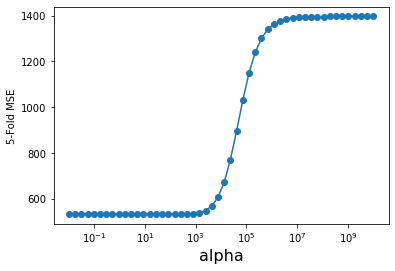

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_vector = np.logspace(-2,10,50)
# ...
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Ridge (train): 530
MSE Modelo Ridge (test) : 560
RMSE Modelo Ridge (train): 23
RMSE Modelo Ridge (test) : 23.7
Experiences Offered [  0.           0.84642874   1.68274786  -0.60538019 -13.98548479
   9.95802499   3.80873097   5.01215588   6.38291533   1.0081674
  -0.39960411  -0.02510638  -3.80470067   3.14560323  -0.75939479
   3.32513363]


Como se puede observar no se obtiene un resultado demasiado bueno, el error medio obtenido en el subconjunto de entrenamiento es de 23€ y en el de test de 23.7€. Teniendo en cuenta que la media del precio es de 73.7€, es un error bastante alto.

Ahora se va a probar aplicando el algoritmo de regresión de Lasso, seleccionando también el valor de alpha mediante validación cruzada.

best mean cross-validation score: -532.953
best parameters: {'alpha': 0.032374575428176434}


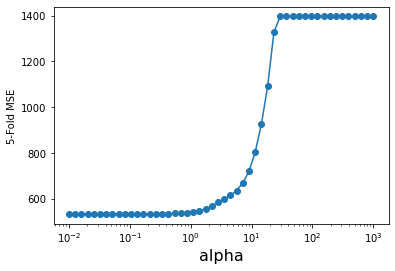

In [82]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha_vector = np.logspace(-2,3,50)
# ...
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 530
MSE Modelo Lasso (test) : 560
RMSE Modelo Lasso (train): 23
RMSE Modelo Lasso (test) : 23.7
Experiences Offered 0.0
Neighbourhood Cleansed 0.819064951731727
Latitude 1.651448052440009
Longitude -0.5627823515071266
Room Type -14.017761971860159
Accommodates 9.99585630338277
Bathrooms 3.8000702030714777
Bedrooms 4.996005317266853
Cleaning Fee 6.361050904683299
Guests Included 0.9579092374826863
Minimum Nights -0.36847159101077875
Maximum Nights -0.0
Number of Reviews -3.790476292741225
Review Scores Rating 3.1299976211428757
Cancellation Policy -0.7325509247969286
Availability 3.3145414630490557


Como se puede observar, se ha obtenido exactamente el mismo error que el obtenido con Ridge, pero en Lasso se han desactivado las variables 'Experiences Offered' y 'Maximum Nights', por lo que se ha mejorado la interpretabilidad del modelo.

Se aplicaron ambos algoritmos de regresión con el logaritmo de la variable objetivo 'Precio', pero no se obtuvieron mejores resultados, es más, en el subconjunto de test se obtuvieron resultados un poco peores (después de realizar la antitransformada), por lo que se optó por no aplicar el logaritmo.

Para reducir ese error se deberían añadir otras variables o definir unas nuevas a partir de las existentes que permitan realizar una mejor predicción. En este caso, por limitaciones de tiempo no se puede afrontar esta mejora, por lo que se va a continuar con este entorno.

Se va a proceder a probar con Random Forest.

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=1, total=   1.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=1, total=   1.1s
[CV] max_depth=1 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=1, total=   1.1s
[CV] max_depth=1 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=1, total=   1.1s
[CV] max_depth=1 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=1, total=   1.0s
[CV] max_depth=2 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=2, total=   1.7s
[CV] max_depth=2 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=2, total=   1.7s
[CV] max_depth=2 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=2, total=   1.7s
[CV] max_depth=2 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=2, total=   1.8s
[CV] max_depth=2 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=2, total=   1.7s
[CV] max_depth=3 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=3, total=   2.2s
[CV] max_depth=3 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=3, total=   2.3s
[CV] max_depth=3 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=3, total=   2.5s
[CV] max_depth=3 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=3, total=   2.2s
[CV] max_depth=3 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=3, total=   2.2s
[CV] max_depth=4 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=4, total=   3.1s
[CV] max_depth=4 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=4, total=   2.9s
[CV] max_depth=4 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=4, total=   2.7s
[CV] max_depth=4 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=4, total=   2.7s
[CV] max_depth=4 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=4, total=   2.7s
[CV] max_depth=5 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=5, total=   3.2s
[CV] max_depth=5 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=5, total=   3.2s
[CV] max_depth=5 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=5, total=   3.2s
[CV] max_depth=5 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=5, total=   3.2s
[CV] max_depth=5 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=5, total=   3.2s
[CV] max_depth=6 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=6, total=   3.8s
[CV] max_depth=6 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=6, total=   3.8s
[CV] max_depth=6 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=6, total=   3.7s
[CV] max_depth=6 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=6, total=   3.8s
[CV] max_depth=6 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=6, total=   3.7s
[CV] max_depth=7 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=7, total=   4.3s
[CV] max_depth=7 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=7, total=   4.4s
[CV] max_depth=7 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=7, total=   4.3s
[CV] max_depth=7 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=7, total=   4.3s
[CV] max_depth=7 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=7, total=   4.3s
[CV] max_depth=8 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=8, total=   4.8s
[CV] max_depth=8 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=8, total=   4.8s
[CV] max_depth=8 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=8, total=   4.8s
[CV] max_depth=8 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=8, total=   4.8s
[CV] max_depth=8 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=8, total=   4.8s
[CV] max_depth=9 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=9, total=   5.4s
[CV] max_depth=9 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=9, total=   5.3s
[CV] max_depth=9 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=9, total=   5.3s
[CV] max_depth=9 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=9, total=   5.4s
[CV] max_depth=9 .....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ...................................... max_depth=9, total=   5.3s
[CV] max_depth=10 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=10, total=   5.8s
[CV] max_depth=10 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=10, total=   5.8s
[CV] max_depth=10 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=10, total=   5.8s
[CV] max_depth=10 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=10, total=   6.1s
[CV] max_depth=10 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=10, total=   6.2s
[CV] max_depth=11 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=11, total=   6.4s
[CV] max_depth=11 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=11, total=   6.3s
[CV] max_depth=11 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=11, total=   6.3s
[CV] max_depth=11 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=11, total=   6.4s
[CV] max_depth=11 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=11, total=   6.2s
[CV] max_depth=12 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=12, total=   6.7s
[CV] max_depth=12 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=12, total=   6.7s
[CV] max_depth=12 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=12, total=   6.9s
[CV] max_depth=12 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=12, total=   6.8s
[CV] max_depth=12 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=12, total=   6.9s
[CV] max_depth=13 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=13, total=   7.4s
[CV] max_depth=13 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=13, total=   7.2s
[CV] max_depth=13 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=13, total=   7.2s
[CV] max_depth=13 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=13, total=   7.3s
[CV] max_depth=13 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=13, total=   7.9s
[CV] max_depth=14 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=14, total=   7.8s
[CV] max_depth=14 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=14, total=   7.8s
[CV] max_depth=14 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=14, total=   7.7s
[CV] max_depth=14 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=14, total=   7.8s
[CV] max_depth=14 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=14, total=   7.8s
[CV] max_depth=15 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=15, total=   8.2s
[CV] max_depth=15 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=15, total=   8.2s
[CV] max_depth=15 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=15, total=   8.1s
[CV] max_depth=15 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=15, total=   8.2s
[CV] max_depth=15 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=15, total=   8.2s
[CV] max_depth=16 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=16, total=   8.7s
[CV] max_depth=16 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=16, total=   8.5s
[CV] max_depth=16 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=16, total=   8.6s
[CV] max_depth=16 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=16, total=   8.5s
[CV] max_depth=16 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=16, total=   8.5s
[CV] max_depth=17 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=17, total=   8.8s
[CV] max_depth=17 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=17, total=   8.9s
[CV] max_depth=17 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=17, total=   8.7s
[CV] max_depth=17 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=17, total=   8.7s
[CV] max_depth=17 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=17, total=   8.8s
[CV] max_depth=18 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=18, total=   9.1s
[CV] max_depth=18 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=18, total=   9.1s
[CV] max_depth=18 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=18, total=   9.0s
[CV] max_depth=18 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=18, total=   9.8s
[CV] max_depth=18 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=18, total=  10.3s
[CV] max_depth=19 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=19, total=  12.4s
[CV] max_depth=19 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=19, total=  12.7s
[CV] max_depth=19 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=19, total=   9.8s
[CV] max_depth=19 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=19, total=   9.3s
[CV] max_depth=19 ....................................................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................................... max_depth=19, total=   9.2s


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  9.1min finished
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best mean cross-validation score: 0.739
best parameters: {'max_depth': 19}


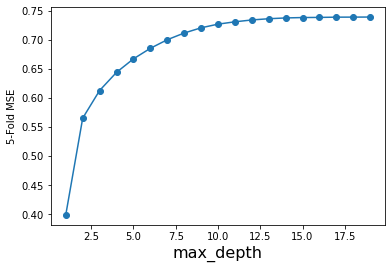

In [85]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(RandomForestRegressor(n_estimators=200, random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [94]:
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 9 #Se establece este valor manualmente porque se observa que es el que puede aportar mejores resultados con una menor complejidad
rf = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))

<ipython-input-94-4d5ffe92ebf8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)


Train:  0.8059862631037874
Test:  0.7208193637577197


El resultado del score del modelo de Random Forest en el dataset de test es de 0.72, que no es muy bueno.

A continuación se mide la importancia de las variables para el modelo de Random Forest anterior.

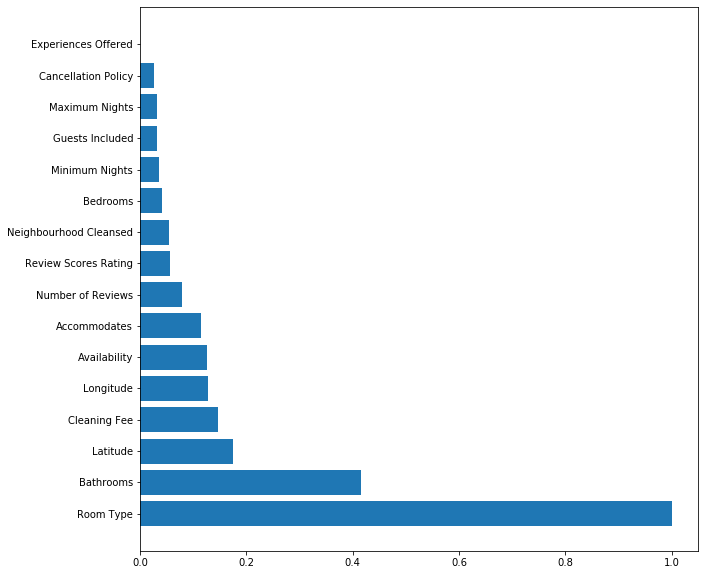

In [87]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Ahora se va a probar con Gradient Boosting Regressor.

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.1, n_estimators=500, total=   7.4s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.1, n_estimators=500, total=   7.4s
[CV] learning_rate=0.1, n_estimators=500 .............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.1, n_estimators=500, total=   7.4s
[CV] learning_rate=0.1, n_estimators=500 .............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.1, n_estimators=500, total=   7.4s
[CV] learning_rate=0.1, n_estimators=500 .............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.1, n_estimators=500, total=   8.1s
[CV] learning_rate=0.1, n_estimators=1000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1000, total=  15.8s
[CV] learning_rate=0.1, n_estimators=1000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1000, total=  16.6s
[CV] learning_rate=0.1, n_estimators=1000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1000, total=  14.0s
[CV] learning_rate=0.1, n_estimators=1000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1000, total=  14.1s
[CV] learning_rate=0.1, n_estimators=1000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1000, total=  14.1s
[CV] learning_rate=0.1, n_estimators=1500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1500, total=  21.1s
[CV] learning_rate=0.1, n_estimators=1500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1500, total=  21.1s
[CV] learning_rate=0.1, n_estimators=1500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1500, total=  21.2s
[CV] learning_rate=0.1, n_estimators=1500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1500, total=  21.2s
[CV] learning_rate=0.1, n_estimators=1500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=1500, total=  21.7s
[CV] learning_rate=0.1, n_estimators=2000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=2000, total=  28.2s
[CV] learning_rate=0.1, n_estimators=2000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=2000, total=  28.1s
[CV] learning_rate=0.1, n_estimators=2000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=2000, total=  28.3s
[CV] learning_rate=0.1, n_estimators=2000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=2000, total=  28.0s
[CV] learning_rate=0.1, n_estimators=2000 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.1, n_estimators=2000, total=  28.3s
[CV] learning_rate=0.05, n_estimators=500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.05, n_estimators=500, total=   7.0s
[CV] learning_rate=0.05, n_estimators=500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.05, n_estimators=500, total=   7.0s
[CV] learning_rate=0.05, n_estimators=500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.05, n_estimators=500, total=   7.0s
[CV] learning_rate=0.05, n_estimators=500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.05, n_estimators=500, total=   7.0s
[CV] learning_rate=0.05, n_estimators=500 ............................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. learning_rate=0.05, n_estimators=500, total=   7.1s
[CV] learning_rate=0.05, n_estimators=1000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1000, total=  14.1s
[CV] learning_rate=0.05, n_estimators=1000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1000, total=  14.2s
[CV] learning_rate=0.05, n_estimators=1000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1000, total=  14.0s
[CV] learning_rate=0.05, n_estimators=1000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1000, total=  14.0s
[CV] learning_rate=0.05, n_estimators=1000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1000, total=  14.1s
[CV] learning_rate=0.05, n_estimators=1500 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1500, total=  21.0s
[CV] learning_rate=0.05, n_estimators=1500 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1500, total=  21.1s
[CV] learning_rate=0.05, n_estimators=1500 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1500, total=  21.1s
[CV] learning_rate=0.05, n_estimators=1500 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1500, total=  21.2s
[CV] learning_rate=0.05, n_estimators=1500 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=1500, total=  21.1s
[CV] learning_rate=0.05, n_estimators=2000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=2000, total=  28.1s
[CV] learning_rate=0.05, n_estimators=2000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=2000, total=  28.2s
[CV] learning_rate=0.05, n_estimators=2000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=2000, total=  28.0s
[CV] learning_rate=0.05, n_estimators=2000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=2000, total=  29.2s
[CV] learning_rate=0.05, n_estimators=2000 ...........................


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ learning_rate=0.05, n_estimators=2000, total=  29.7s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 11.9min finished
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best mean cross-validation score: 0.747
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


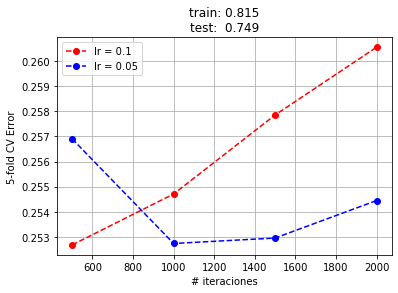

In [89]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

El resultado del score que se ha obtenido en el dataset de test con el modelo de Gradient Boosting Regressor es de 0.749, que no es tan bueno como lo esperado.

A continuación se mide la importancia de las variables para el modelo de Gradient Boosting Regressor anterior. Se puede observar que las dos variables más valiosas coindicen con las del modelo de Random Forest pero el resto no coincide.

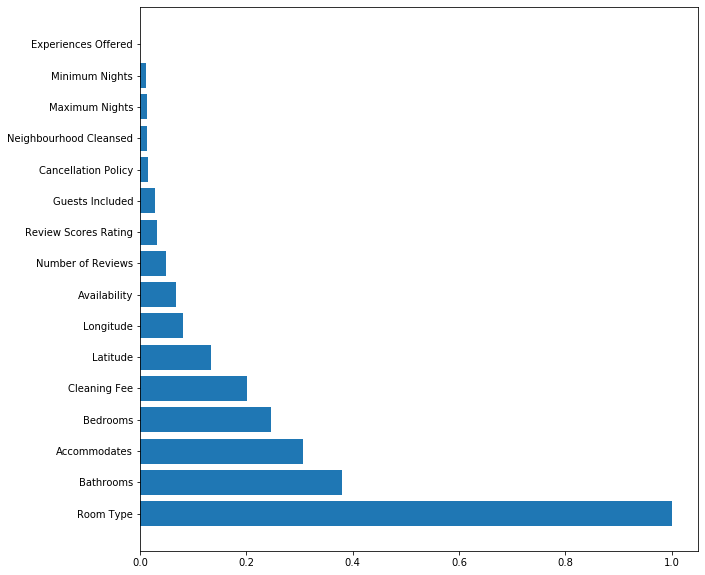

In [90]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Ahora se va a evaluar con SVM.

In [91]:
from sklearn.svm import SVR

vectorC = np.logspace(-1.5, 3, 10)
vectorG = np.logspace(-6, 0.5, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([3.16227766e-02, 1.00000000e-01, 3.16227766e-01, 1.00000000e+00,
       3.16227766e+00, 1.00000000e+01, 3.16227766e+01, 1.00000000e+02,
       3.16227766e+02, 1.00000000e+03]),
                         'gamma': array([1.00000000e-06, 8.48342898e-06, 7.19685673e-05, 6.10540230e-04,
       5.17947468e-03, 4.39397056e-02, 3.72759372e-01, 3.16227766e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

best mean cross-validation score: 0.721
best parameters: {'C': 100.0, 'gamma': 0.04393970560760795}


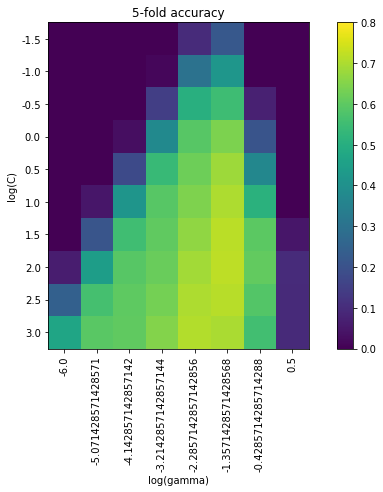

In [98]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [101]:
import math
print(f"Log(C): {math.log10(grid.best_params_['C'])}\nLog(gamma): {math.log10(grid.best_params_['gamma'])}")

Log(C): 2.0
Log(gamma): -1.3571428571428568


In [100]:

Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

C:\Users\Oremil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acc (TEST): 0.73


Como se puede observar, el score obtenido para al dataset de test con el modelo de SVM es de 0.73, que no mejora los resultados de los modelos anteriores, por lo que no es un buen resultado.

Se han utilizado tres modelos, y en cada uno de ellos se han elegido los hiperparámetros mediante validación cruzada. El score en el dataset de test obtenido por cada uno de ellos es: Random Forest un 0.72, Gradient Boosting Regressor un 0.749, y SVM un 0.73. Ninguno de esos tres modelos ofrece unos buenos resultados, siendo todos los resultados muy similares. El que mejor resultado ofrece es el de **Gradient Boosting Regressor**.

Para conseguir unos mejores resultados se podría, por una parte, ajustar los valores de los hiperparámetros de los modelos, por ejemplo, modificando el rango de posibilidades en la validación cruzada. Por otra parte, definir nuevas variables a partir de las existentes, hacer uso de variables que se han descartado, o procesar el valor de ciertas variables que contienen una información muy valiosa pero tiene que ser tratada para que los modelos puedan hacer uso de ella, como por ejemplo la variable 'Amenities'. Debido a limitaciones de tiempo, no se van a poder afrontar estas mejoras que probablemente mejorarían los resultados obtenidos, por lo que el modelo que ha ofrecido mejores resultados es el de **Gradient Boosting Regressor**.